# <div align="center">CM1</div>


###  1.1 Required Libraries

In [2]:
import numpy as np
import pandas as pd
from numpy import mean, std
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score,train_test_split
import seaborn as sns
from sklearn import preprocessing, metrics,tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

### 1.2 Load dataset and assign column names to each feature

Removed rows from dataset which have **/t** or **extra spaces** via **error_bad_lines = False**. There are no missing values in dataset as well. Except target feature all features have float datatype.

For target feature dataset have 3 integer values for varieties of wheat :

- target = 1 --> **"Kama"**
- target = 2 --> **"Rosa"**
- target = 3 --> **"Canadian"**

In [3]:
df = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines = False, warn_bad_lines =True)
df.columns = ['area', 'perimeter','compactness', 'length_kernel', 'width_kernel', 'asymmetry_coeff', 'length_of_kernel_groove', 'target']
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     198 non-null    float64
 1   perimeter                198 non-null    float64
 2   compactness              198 non-null    float64
 3   length_kernel            198 non-null    float64
 4   width_kernel             198 non-null    float64
 5   asymmetry_coeff          198 non-null    float64
 6   length_of_kernel_groove  198 non-null    float64
 7   target                   198 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.5 KB


b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


### 1.3 Seaborn plotting 

Seaborn plotting help to explore and understand data. Moreover it's plotting functions operate on whole datasets and internally perform aggergation and mapping to produce informative plots. As our dataset contain 7 features and 1 target attribute, seaborn  will plot 7x7 plots to compare target attribute.


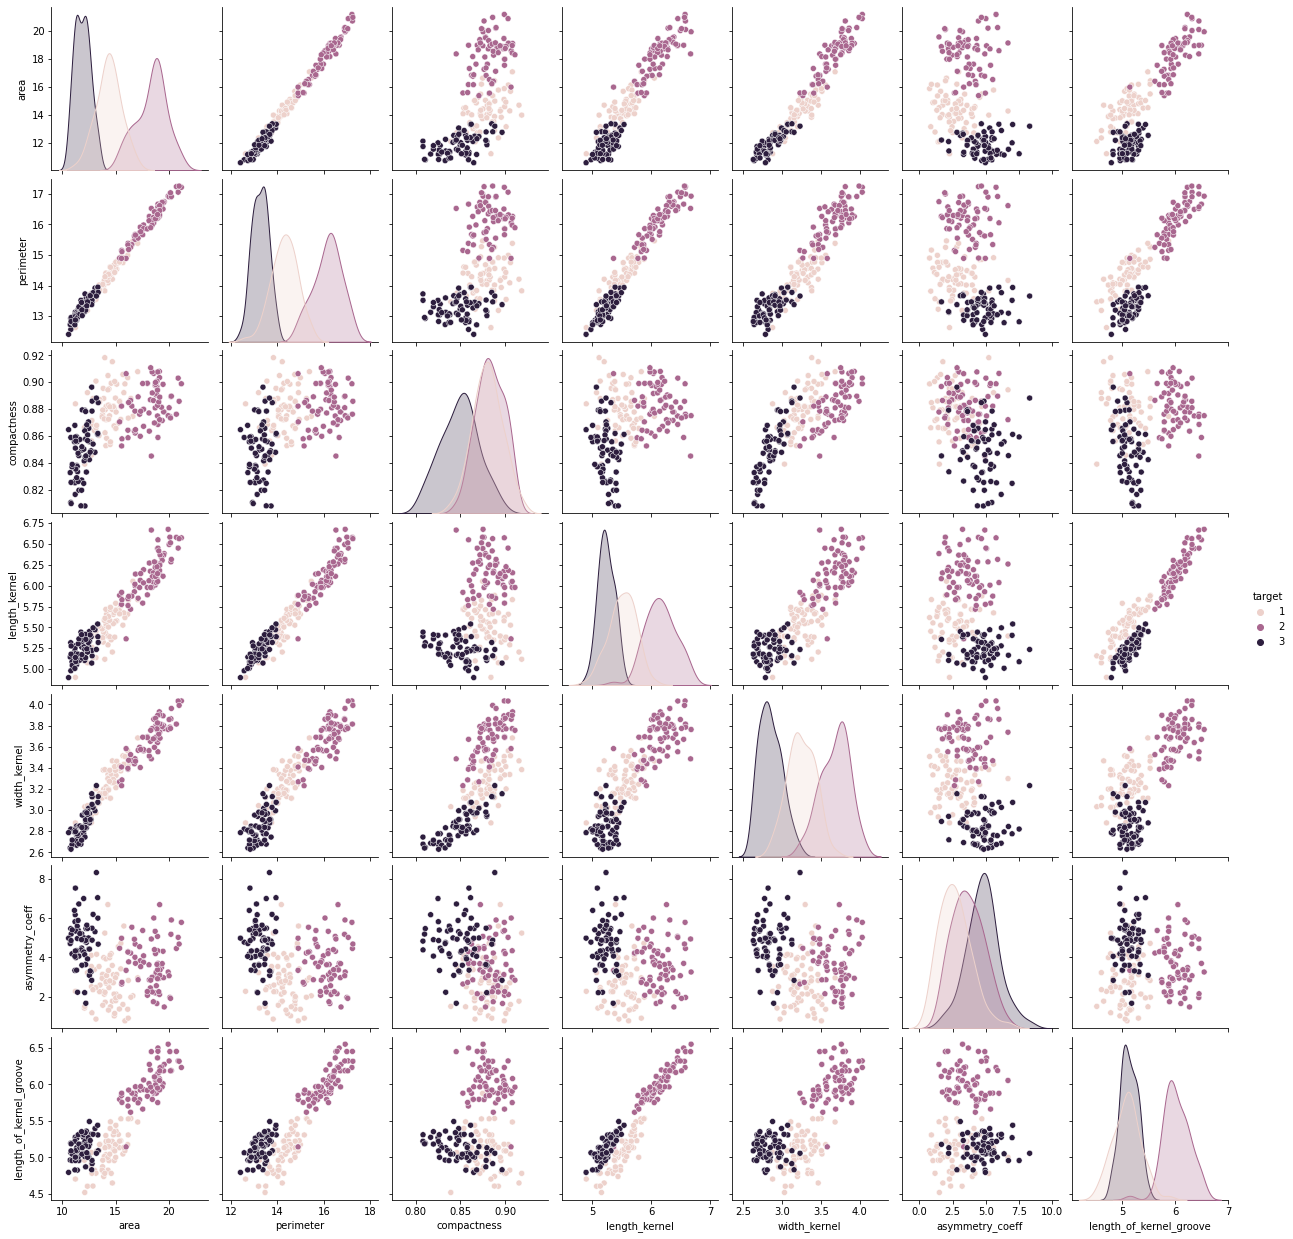

In [4]:
sns.pairplot(df, hue='target')

#### 1.3.1 Conclusion from Seaborn plotting 

- From plotting, It can be conclude that there are many parameters such as area, perimeter and length_of_kernel from which we can easily categorize target variable. However for all samples it can be difficult to identify variety of wheat (target value).


### 1.4 Extracting features and label from dataset

x variable contains all features values and y variable contains all target values.


In [5]:
x = df.iloc[:, :-1].values

y = df.iloc[:, 7].values

### 1.5 Split dataset into train and test set and testing accuracy without applying k-fold validation 

- Split data set into train and test using train_test_split.
- Divide 15% of dataset in test set whereas rest in train set.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.15,random_state = None)

### 1.6 Data Preprocessing 

- Applying standardization on feature datasets.
- Standardized values are useful for tracking data that isn't easy to compare otherwise.
- In normalisation, there is **no significcant change in performance matrix.**

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
#x = preprocessing.normalize(x)

### 1.6.1 Testing accuracy without applying k-fold validation 

In [8]:
acc1 = []
depth = [3, 5, 10, None]
for k in depth:
    clf = DecisionTreeClassifier(max_depth = k)
    clf = clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(f"Depth : {k} ==> Accuracy:",metrics.accuracy_score(y_test, y_pred))

Depth : 3 ==> Accuracy: 0.8333333333333334
Depth : 5 ==> Accuracy: 0.8333333333333334
Depth : 10 ==> Accuracy: 0.9
Depth : None ==> Accuracy: 0.8666666666666667


### 1.7 Applying 10-fold validation on dataset


**KFold validation :**

- Split data into train/test split.
- Split dataset into k consecytive folds.
- Each shuffle is use as a validation set, where k-1 remaining folds form the training set.

**Parameters :**

- n_splits (int) : Number of folds. Minimum value =2 and default value = 5.
- random_state : When **shuffle**  true, random_state affects the order of indices, which controls the randomness of each fold.
- shuffle (bool) : Whether to shuffles the data before splitting into batches or not.


In [9]:
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
kfold.get_n_splits(x_train)

10

### 1.8 Decision Tree with multiple depth

**Decision Tree Classifier :**
- Decision Tree is non-parametric supervised learning methode used for classification and regression.
- This model predicts the value of a target variable by learning simple decision rules from data features(x).
- Decision tree allows us to combine numerical and non-numerical data dimensions into a single learning process.

**Parameters :**
- max_depth (int) : The maximum depth of the tree. Default value = None ( The nodes are expanded until all leaves are pure or all leaves contain less than min_samples_split samples )

In [10]:
acc1 = []
sd1 = []
accuracy_scores = []
depth = [3, 5, 10, None]
for k in depth:
    model = DecisionTreeClassifier(max_depth = k)
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv = kfold, n_jobs=-1)

    if ( k != None):
        print(f'Depth :  {k} ===> Accuracy = {mean(scores)} and Standard Devaition = {std(scores)}')
      
    else:
        print(f'Depth : {k} ===> Accuracy = {mean(scores)} and Standard Devaition = {std(scores)}')
    acc1 = np.append(acc1, mean(scores))
    sd1 = np.append(sd1, std(scores))
    accuracy_scores.append(model.fit(x_train, y_train).score(x_train, y_train))    

Depth :  3 ===> Accuracy = 0.9404411764705882 and Standard Devaition = 0.037232320297565194
Depth :  5 ===> Accuracy = 0.9286764705882353 and Standard Devaition = 0.0232054909383228
Depth :  10 ===> Accuracy = 0.9227941176470589 and Standard Devaition = 0.02651140643723522
Depth : None ===> Accuracy = 0.9349264705882353 and Standard Devaition = 0.048830671430140506


#### 1.8.1 Accuracy v/s Depth of tree for Decision Tree

**Conclusion :**

- If we apply k-fold validation then we obtain ***more accuray*** increase compare to normal train_test_split.
- For seed dataset, when depth of tree increases accuracy also increase and standard deviation decrease.
- When depth = None, for seed dataset we are not getting maximum accuracy.

**Note :**
- In order to plot 'None' value we convert depth to string.

Text(0, 0.5, 'Accuracy')

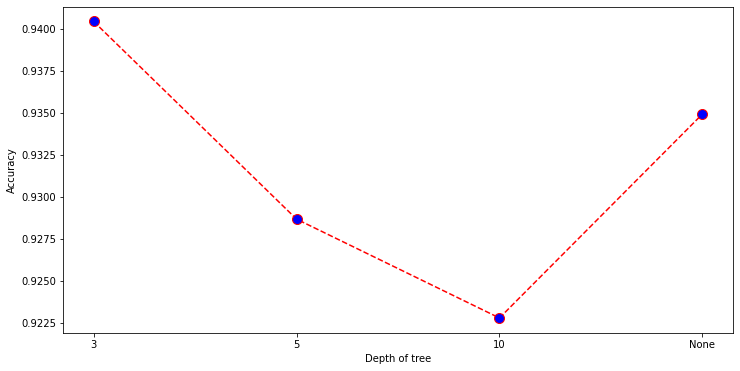

In [11]:
max_depth = list(map(str,depth))
plt.figure(figsize=(12,6))
plt.plot(max_depth,acc1, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')

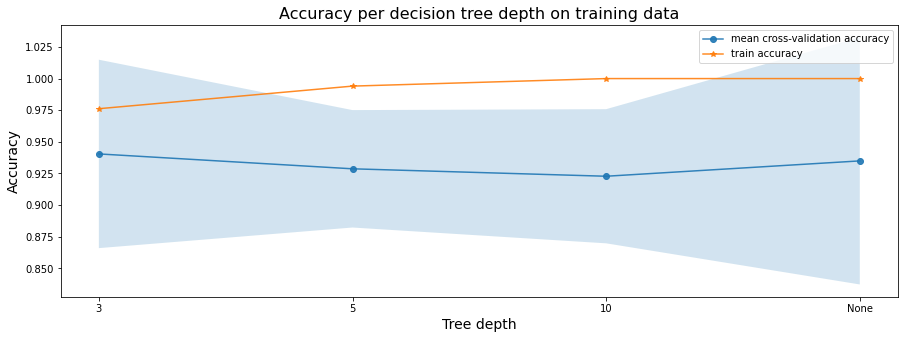

In [12]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(max_depth, acc1, '-o', label='mean cross-validation accuracy', alpha=0.9)
ax.fill_between(max_depth, acc1-2*sd1, acc1+2*sd1, alpha=0.2)
ylim = plt.ylim()
ax.plot(max_depth, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
ax.set_title('Accuracy per decision tree depth on training data', fontsize=16)
ax.set_xlabel('Tree depth', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_ylim(ylim)
ax.set_xticks(max_depth)
ax.legend()

### 1.8.2 In order to achieve highest accuracy model should use  depth = 3  as it achieve highest accuracy in train set 

In [13]:
model1 = DecisionTreeClassifier(max_depth = 3)

model1 = model1.fit(x_train,y_train)

y_pred = model1.predict(x_test)

print(f"Depth : 3 ==> Accuracy:",metrics.accuracy_score(y_test, y_pred))

Depth : 3 ==> Accuracy: 0.8333333333333334


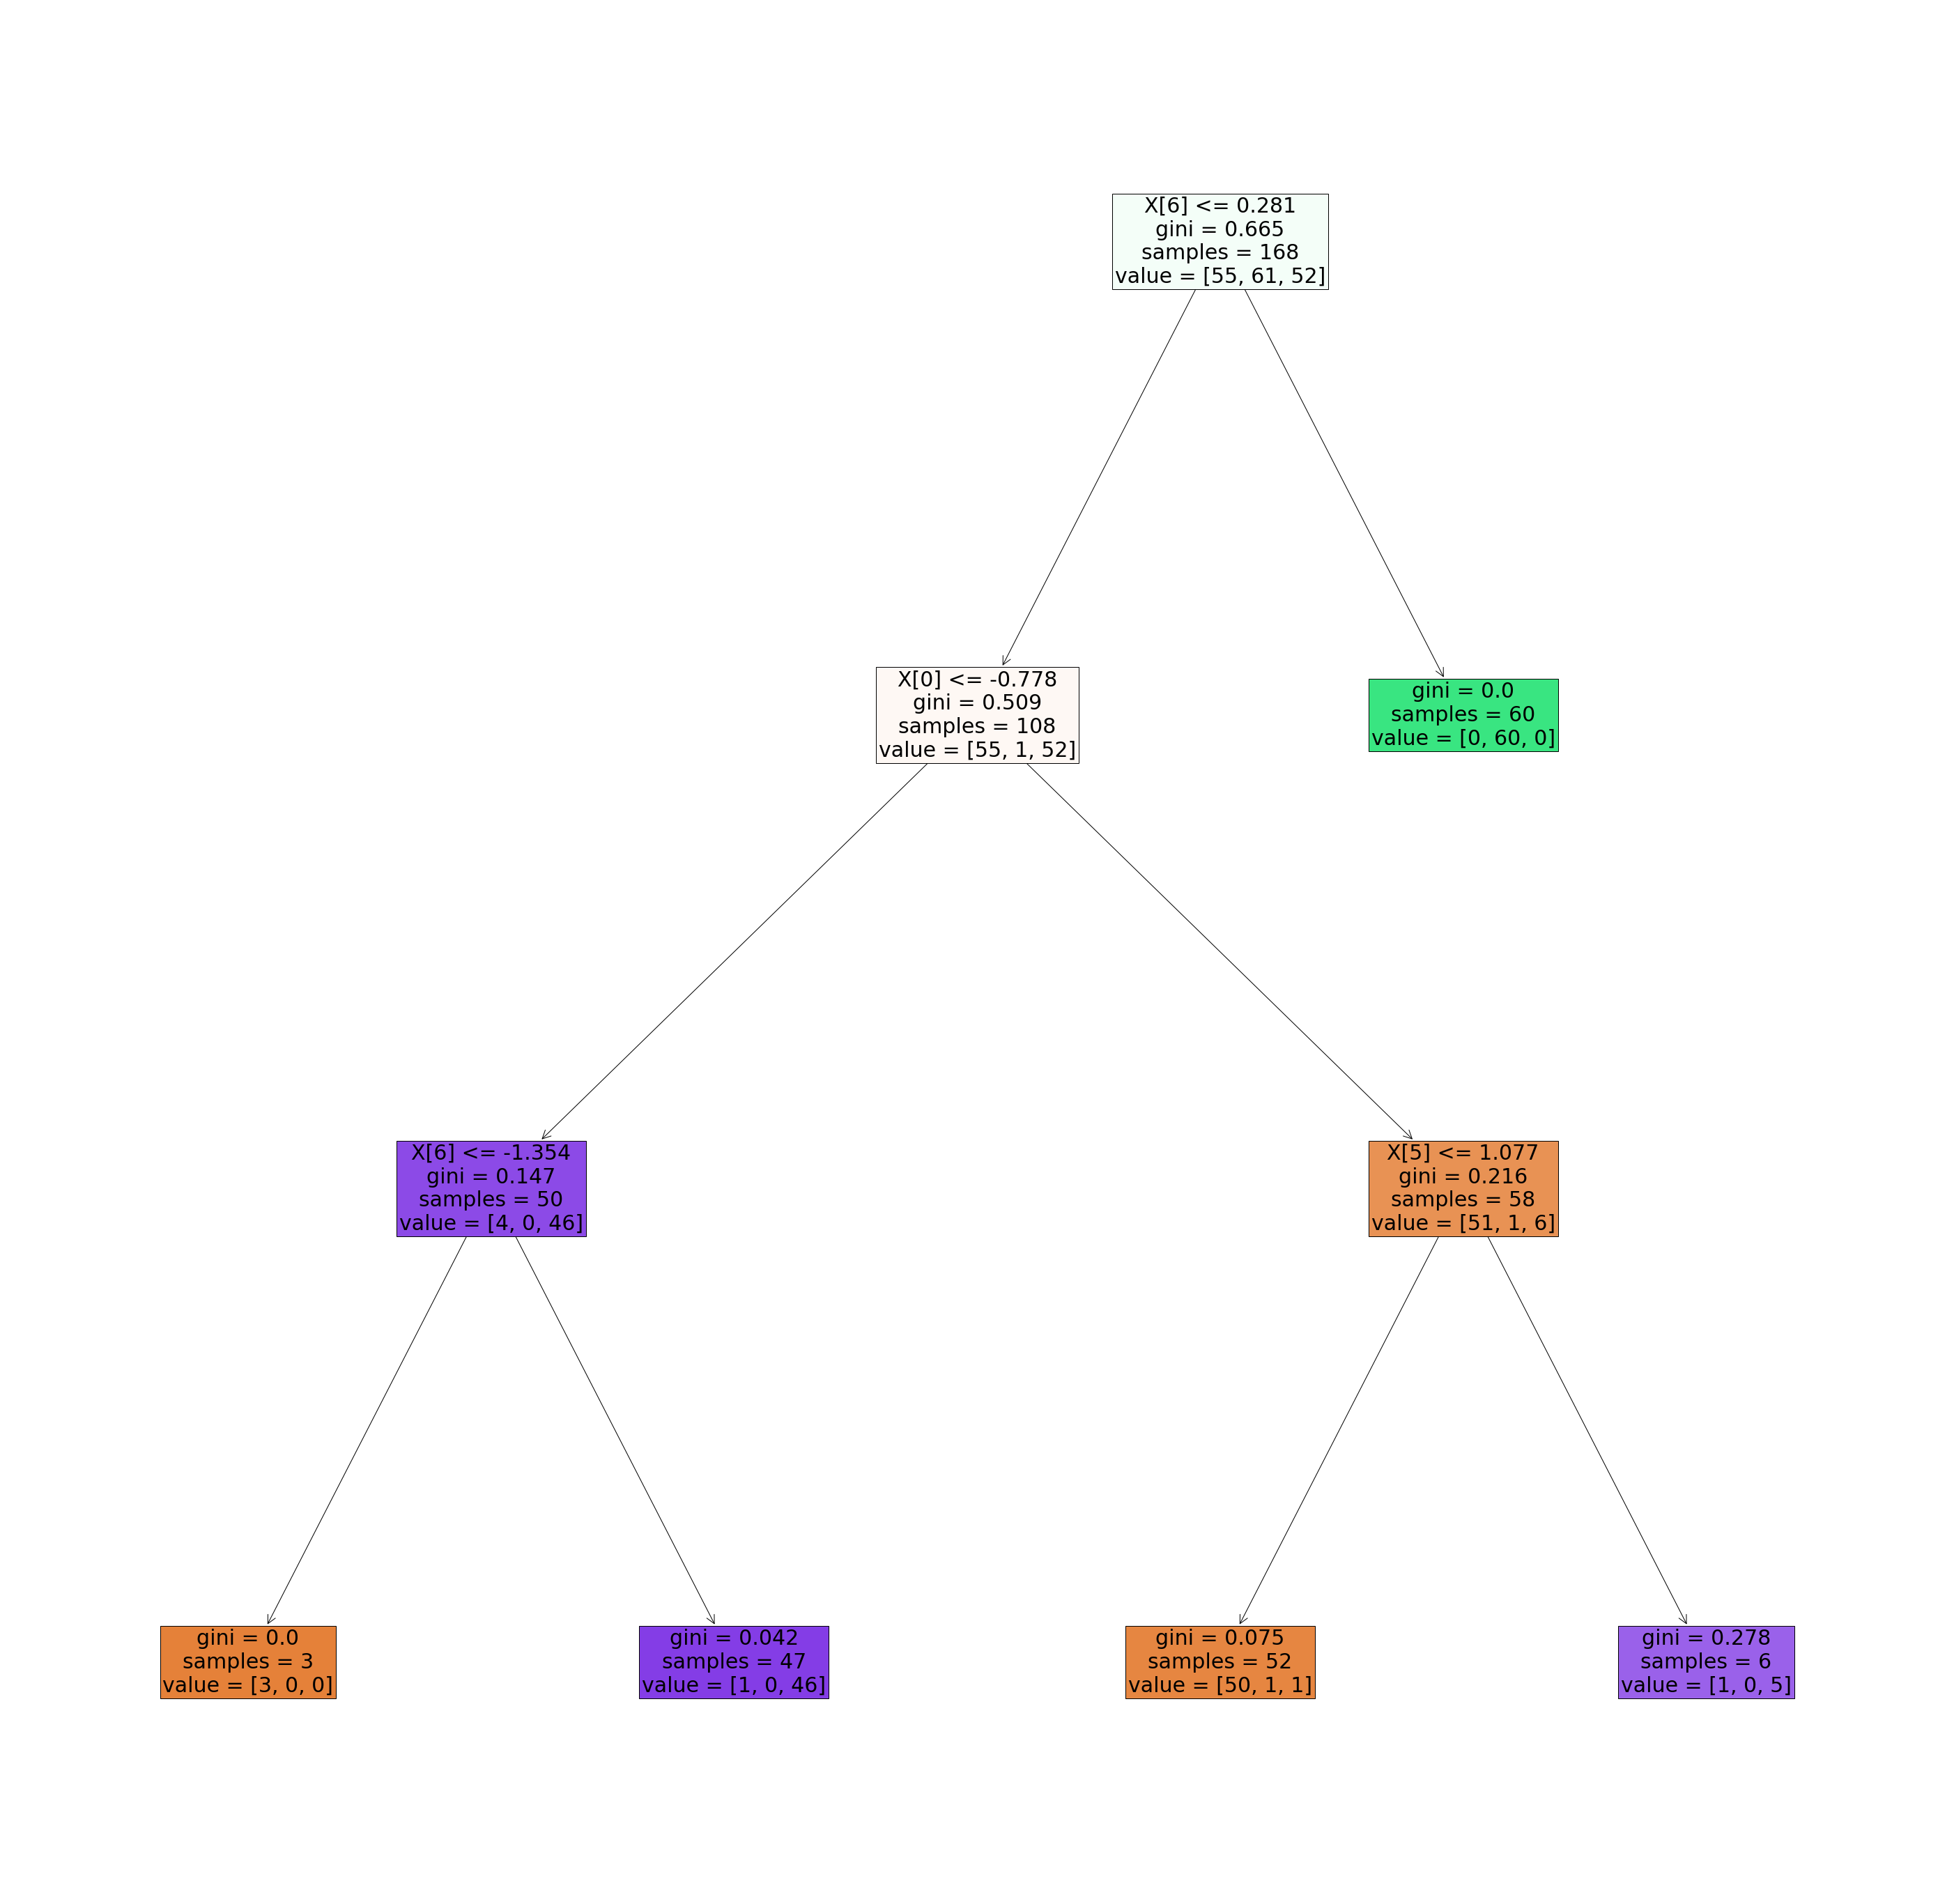

In [14]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(x_train,y_train)
fig = plt.figure(figsize=(50,50))
tree.plot_tree(model,fontsize=30,max_depth=3,filled=True)
plt.show()

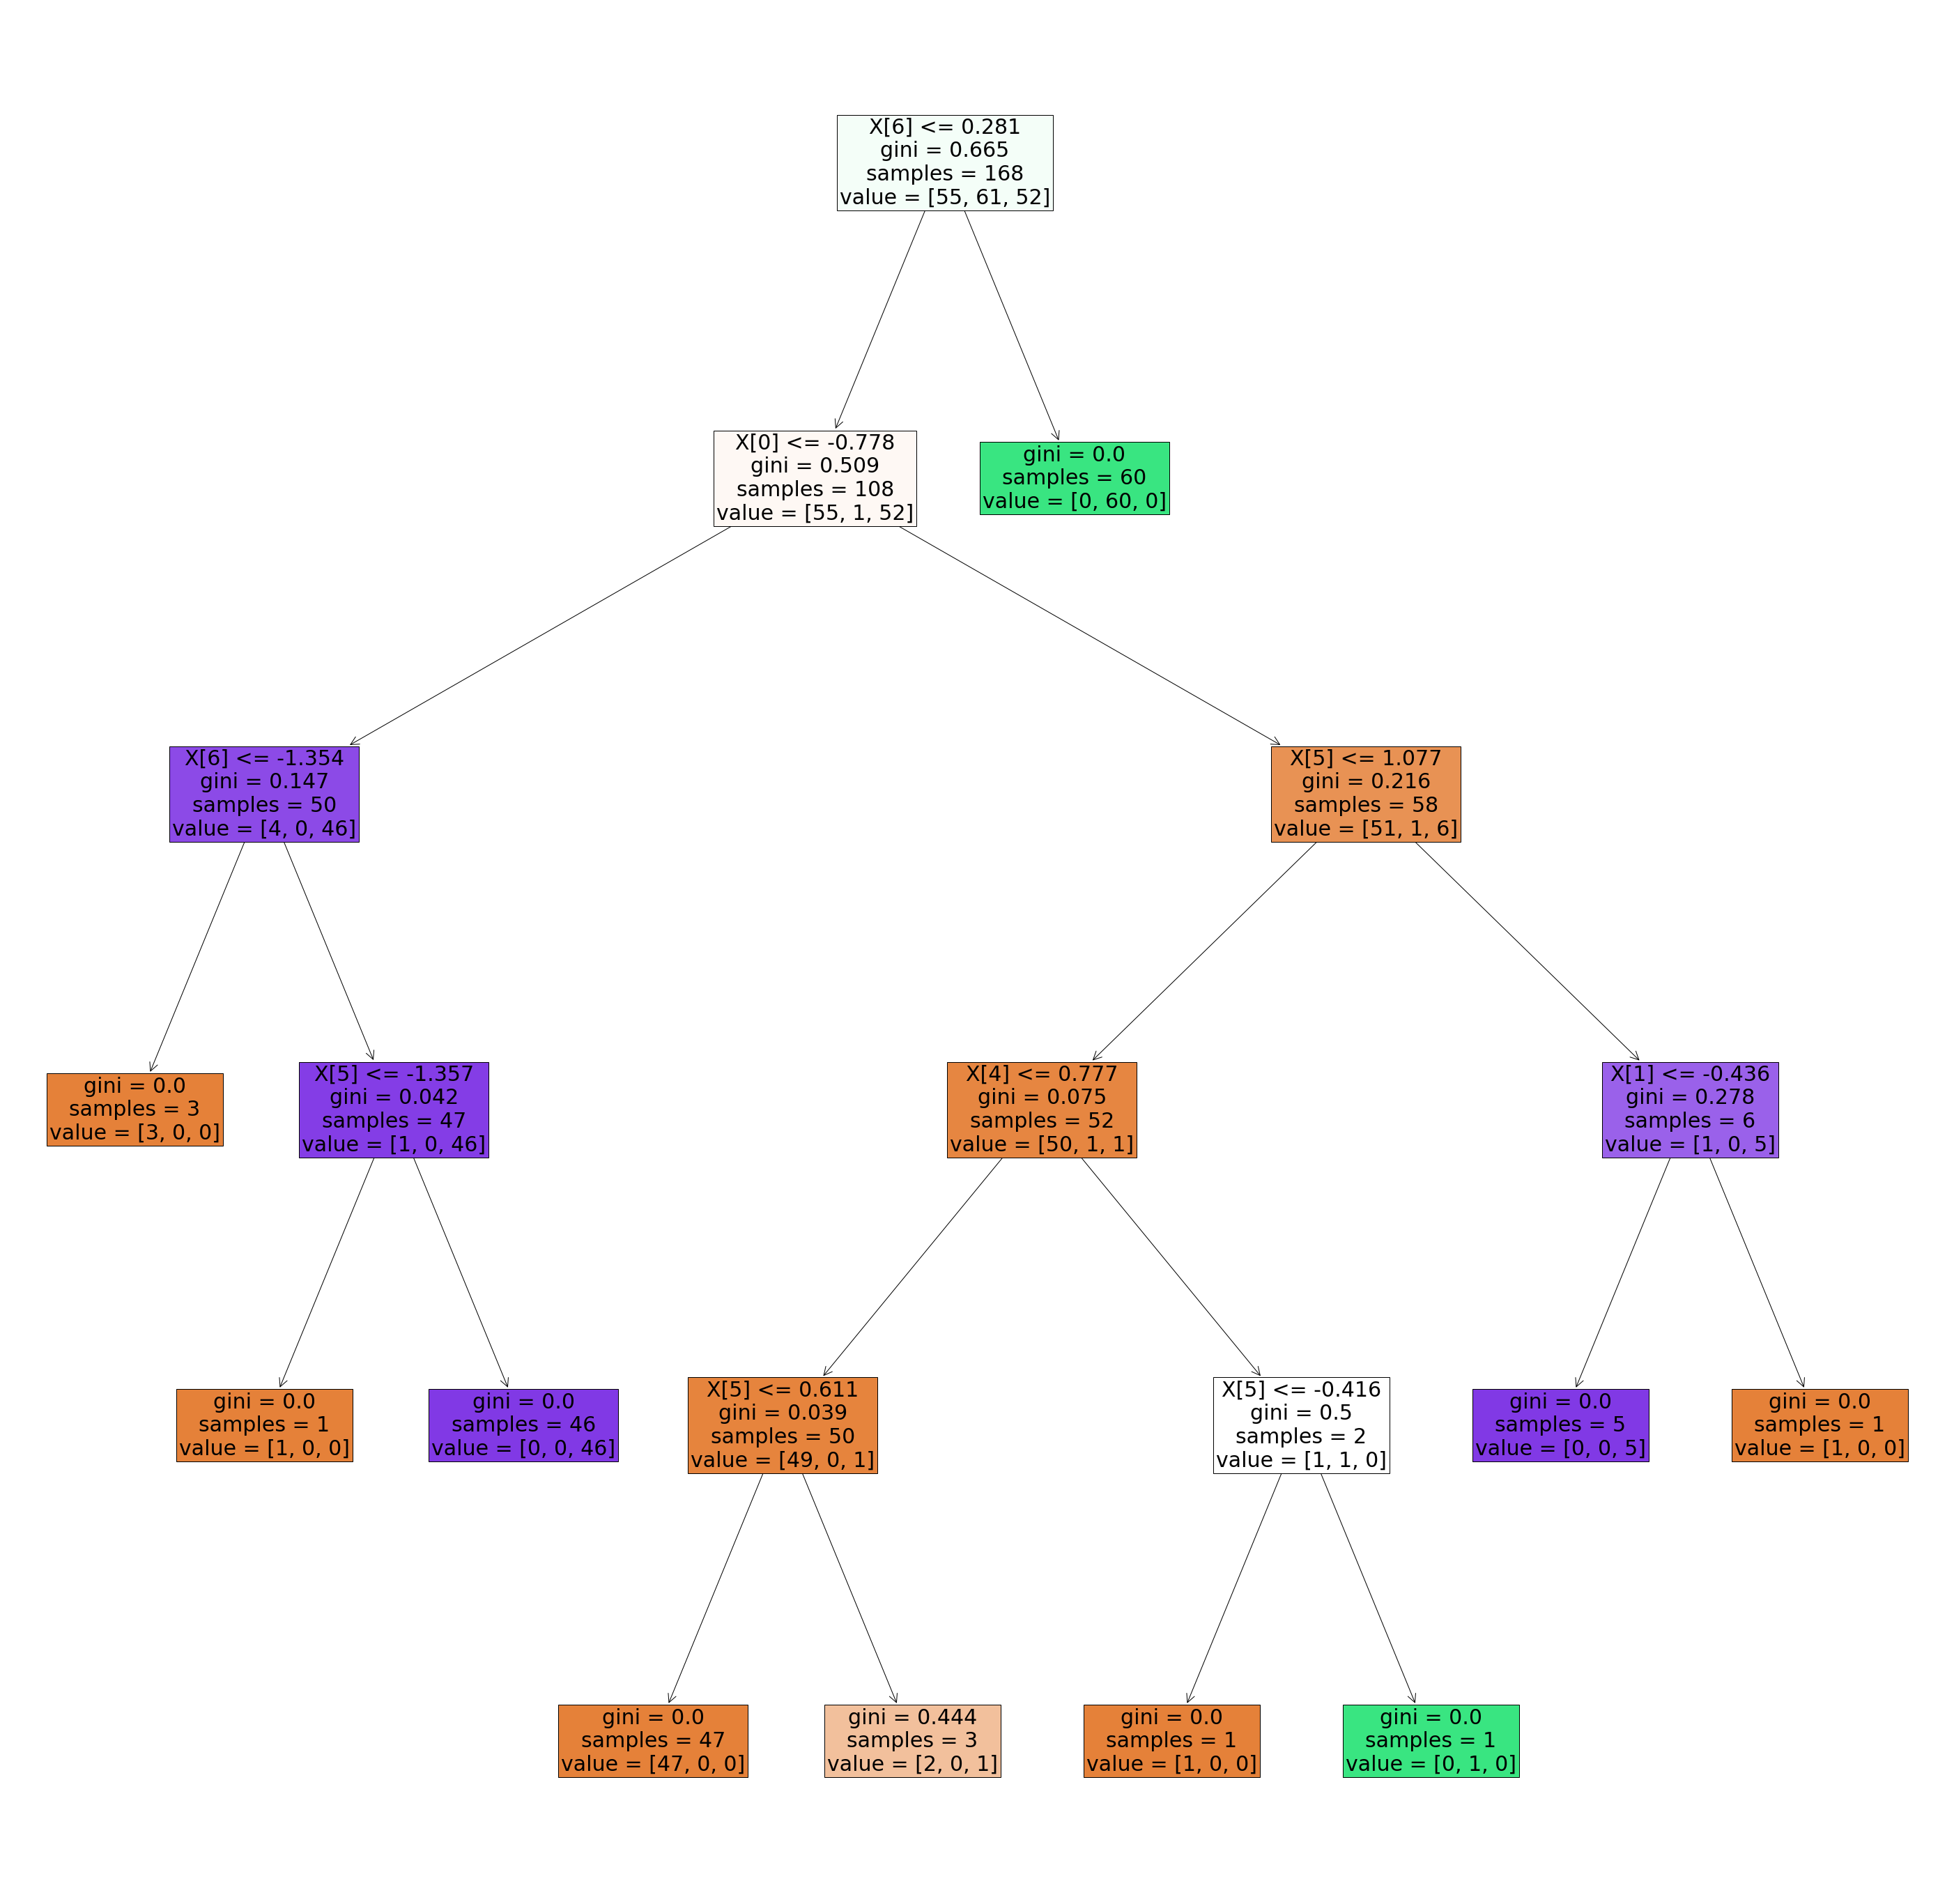

In [15]:
model = DecisionTreeClassifier(max_depth = 5)
model.fit(x_train,y_train)
fig = plt.figure(figsize=(50,50))
tree.plot_tree(model,fontsize=30,max_depth=5,filled=True)
plt.show()

### 1.8.2 Analysis of Decision Tree for max_depth = 3 and depth = 5

1. Root node ( level 0 ) is divided at split point (length_of_kernel_groove <= 0.281) and out of 168 samples tree is divided into 108 and 60 nodes.
2. At level 1 DecisionTreeClassifier further split dataset using area <= 0.778. At level 1 DecisionTreeClassifier able to identify one pure leaf node which has all samples of "Rosa" wheat only.
3. At level 2 there is no pure leaf node exist. At this level DecisionTreeClassifier further split dataset using length_of_kernel_groove <= -1.354 and asymmetry_coeff <= 1.077.
4. At level 3 there 1 pure leaf node which has "Kama" wheat samples only. Other nodes have 47,52 and 6 samples.
5. At level 4 there are 4 pure leaf nodes : 2 samples of "Kama" and 51 samples of "Canadian" wheat.
6. At level 5 there are 3 pure leaf nodes out of 4 :  47 samples of "Kama" and only 1 sample of "Rosa" wheat.


**Conclusion :**

- For depth = 3  model only able to identify 1 pure leaf node only where as for depth = 5 DecisionTreeClassifier able to identify 9 pure leaf nodes.
- Compactness( x[2] ) and length_kernel ( x[3] ) features are not used by DecisionTreeClassifier.
- At root node ( level 0 ) DecisionTreeClassifier choose to select length_of_kernel_groove as a split point.




### 1.9 Random Forest with multiple depth and number of trees

**Random Forest Classifier :**

- In RandomForestClassifier, each tree in the ensembles is built from a sample drawn with replacement ( bootstrap sample ) from the training set.

- Random Forest is a meta estimator that fits a number of a decision tree classifiers on various sub-samples of the dataset and uses averaging to **improve accuray and control overfitting**.

**Parameters :**

- max_depth (int) : The maximum depth of the tree. Default value = None ( The nodes are expanded until all leaves are pure or all leaves contain less than min_samples_split samples ).

- n_estimators (int)  : The number of trees in the forest. Default value = 100.

In [16]:
depth = [3, 5, 10, None]
ntree = [5, 10, 50, 150, 200]

acc2=[]

for i in ntree:
    for k in depth:
            model = RandomForestClassifier(max_depth = k, n_estimators = i)
            scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv = kfold, n_jobs=-1)
 
            if ( k != None):
                    print(f'Number of trees : {i} and Depth : {k}  ===> Accuracy =  {mean(scores)} and Standard Deviation = {std(scores)}')
      
            else:
                    print(f'Number of trees : {i} and Depth : {k}  ===> Accuracy =  {mean(scores)} and Standard Deviation = {std(scores)}')
 
            acc2 = np.append(acc2, mean(scores))
            

Number of trees : 5 and Depth : 3  ===> Accuracy =  0.9224264705882353 and Standard Deviation = 0.05956449682492853
Number of trees : 5 and Depth : 5  ===> Accuracy =  0.9106617647058822 and Standard Deviation = 0.04771061710383829
Number of trees : 5 and Depth : 10  ===> Accuracy =  0.9466911764705882 and Standard Deviation = 0.041243708233597666
Number of trees : 5 and Depth : None  ===> Accuracy =  0.9172794117647058 and Standard Deviation = 0.0468876136431445
Number of trees : 10 and Depth : 3  ===> Accuracy =  0.9286764705882353 and Standard Deviation = 0.057503572929462225
Number of trees : 10 and Depth : 5  ===> Accuracy =  0.8988970588235293 and Standard Deviation = 0.05912720328089323
Number of trees : 10 and Depth : 10  ===> Accuracy =  0.9345588235294118 and Standard Deviation = 0.061360723661838444
Number of trees : 10 and Depth : None  ===> Accuracy =  0.9404411764705882 and Standard Deviation = 0.026347754216424886
Number of trees : 50 and Depth : 3  ===> Accuracy =  0.91

### 1.9.1 Heat plot for mean accuracy for different values of number of trees and depth of tree

**Steps taken to create heat plot :**
1. Stored accuray and converted all values into numpy array.
2. Reshaped that numpy array into 5x4.
3. Created dataframe and added accuracy as data, number of trees as rows and depth as columns.
4. Created heatmap using heatmap feature of seaborn.


Text(0.5, 1.0, 'Heat map for accuracy v/s (depth and number of trees) ')

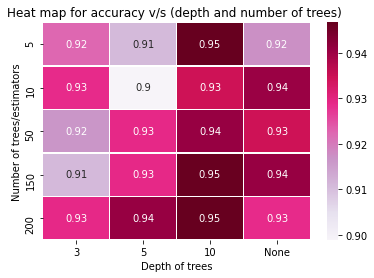

In [22]:
acc2 = [0.9224264705882353 ,0.9106617647058822 ,0.9466911764705882 ,0.9172794117647058 ,0.9286764705882353 ,0.8988970588235293 ,0.9345588235294118 ,0.9404411764705882 ,0.9165441176470589 ,0.9290441176470589 ,0.9408088235294118,0.9345588235294118, 0.9110294117647058 ,0.9290441176470589 ,0.9463235294117647 ,0.9408088235294118 ,0.9290441176470589 ,0.9408088235294118 ,0.9466911764705882  ,0.9286764705882353 ]

acc2 = np.array(acc2)

acc2 = acc2.reshape(5,4)

df_heat = pd.DataFrame(data  = acc2 ,index = ['5', '10', '50', '150', '200'],columns = ['3', '5', '10', 'None'] )
sns.heatmap(df_heat,annot = True, linewidth = 0.5, cmap = "PuRd")
plt.xlabel("Depth of trees")
plt.ylabel("Number of trees/estimators")
plt.title("Heat map for accuracy v/s (depth and number of trees) ")

### 1.9.2 Conclusion of Random forest model

- As number of trees/estimators increase model able to achieve more accuracy and less standard deviation.
- As depth of trees is not positively related with accuracy. But when depth = 5, 10 or None we get higher accuracy whereas for depth = 3 we get lower accuracy compare to others.
- Highest accuray ( 95% ) is achieved at 10 depth of tree and 5,150 and 200 number of trees.
- Lowest acuracy ( 90% ) is achieved at 5 depth of tree and 10 number of trees. 

### 1.9.3 In order to achieve highest accuracy in Random forest, model should use  depth = 3 or depth = None as it achieve highest accuracy in train set 

In [23]:
model2 = RandomForestClassifier(max_depth = 10, n_estimators = 150)

model2 = model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)
print(f"Depth : 5 and number of estimators : 150 ==> Accuracy:",metrics.accuracy_score(y_test, y_pred))

Depth : 5 and number of estimators : 150 ==> Accuracy: 0.9333333333333333


### 1.10 Gradient Tree Boosting with number of estimators

**Gradient Boosting Classifier :**

- This classifier supports both binary and multi-class classfication.
- This model is generalization of boosting to arbitrary differentiable loss functions.
- It has 2 important parameters : ***n_estimators*** and ***learning_rate***.

**Parameters :**

- n_estimators (int) : Number of boosting stages to perform on dataset. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.


In [19]:
acc3 = []
n_estimators = [5, 10, 50, 150, 200]
for i in n_estimators:
    model = GradientBoostingClassifier(n_estimators = i)
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv = kfold, n_jobs=-1)
    print(f'Number of boosting stages =   {i} ==> Accuracy =  {mean(scores)} and Standard Devaition = {std(scores)}')
    acc3 = np.append(acc3, mean(scores))

Number of boosting stages =   5 ==> Accuracy =  0.9227941176470587 and Standard Devaition = 0.03734830911529499
Number of boosting stages =   10 ==> Accuracy =  0.9349264705882353 and Standard Devaition = 0.03162833266765165
Number of boosting stages =   50 ==> Accuracy =  0.9525735294117647 and Standard Devaition = 0.03543362440894701
Number of boosting stages =   150 ==> Accuracy =  0.9463235294117647 and Standard Devaition = 0.048973017074549166
Number of boosting stages =   200 ==> Accuracy =  0.9463235294117647 and Standard Devaition = 0.048973017074549166


### 1.10.1 Accuracy vs number of estimators for Gradient Tree Boosting

**Conclusion :**

- As number of boosting stages ( n_estimators ) increases it is not necessary to obtain more accuracy.
- In seed dataset, highest accuracy is obtained at n_estimators = 150 and 200.
- In order to get highest accuracy in datasert n_estimators should increase, but after some time model will be very slow to perform computation and may not able to achieve more accuracy.

Text(0, 0.5, 'Accuracy')

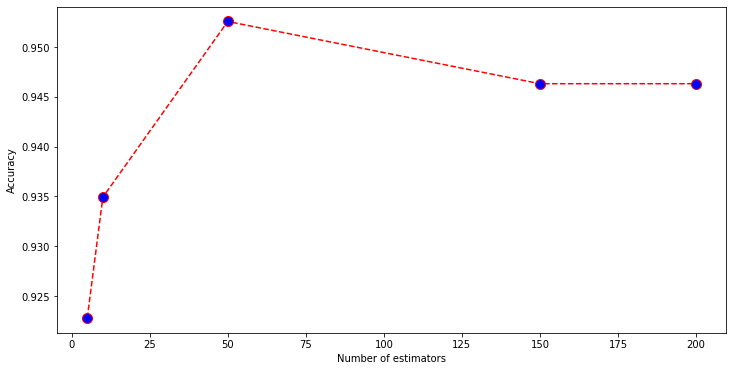

In [20]:
plt.figure(figsize=(12,6))
plt.plot(n_estimators,acc3, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')

### 1.10.2 In order to achieve highest accuracy in Gradient Tree Boosting, model should use  number of boosting stages = 50 as it achieve highest accuracy in train set 

In [24]:
model3 = GradientBoostingClassifier(n_estimators = 50)

model3 = model3.fit(x_train,y_train)
y_pred = model3.predict(x_test)
print(f"Number of boosting stages : 150 ==> Accuracy:",metrics.accuracy_score(y_test, y_pred))

Number of boosting stages : 150 ==> Accuracy: 0.9333333333333333
